## Homework 4

* Nonlinear regression
* Statistical and other functions
* Create bar plot

#### Problem #1
Solution in Python for comparison to Excel solution.

Data
   Time (sec)  Heart Rate (BPM)
0         0.0               103
1         5.0               103
2        10.0               103
3        15.0               105
4        20.0               108
Optimal parameters
[1.42373197e+02 9.24806136e-03 4.00292041e+01 6.84029132e-03]
R^2: 0.9930375847646636


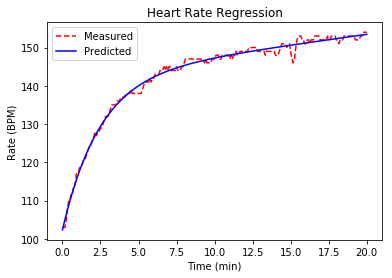

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# import data
# Time (sec),Heart Rate (BPM)
url = 'https://apmonitor.com/che263/uploads/Main/heart_rate.txt'
x = pd.read_csv(url)

# print first rows
print('Data')
print(x.head())

# extract vectors
t = x['Time (sec)'].values
ym = x['Heart Rate (BPM)'].values

# define function for fitting
def bpm(t,c0,c1,c2,c3):
    return c0+c1*t-c2*np.exp(-c3*t)

# find optimal parameters
p0 = [100,0.01,100,0.01]        # initial guesses
c,cov = curve_fit(bpm,t,ym,p0)  # fit model

# print parameters
print('Optimal parameters')
print(c)

# calculate prediction
yp = bpm(t,c[0],c[1],c[2],c[3])

# calculate r^2
print('R^2: ' + str(r2_score(ym,yp)))

# plot data and prediction
plt.figure()
plt.title('Heart Rate Regression')
plt.plot(t/60.0,ym,'r--',label='Measured')
plt.plot(t/60.0,yp,'b-',label='Predicted')
plt.ylabel('Rate (BPM)')
plt.xlabel('Time (min)')
plt.legend(loc='best')
plt.show()

Data
   Time (sec)  Heart Rate (BPM)
0         0.0               103
1         5.0               103
2        10.0               103
3        15.0               105
4        20.0               108
Optimal parameters
142.52427858
0.0092442655788
40.220808193
0.0068438326853
R^2: 0.9928992876987611


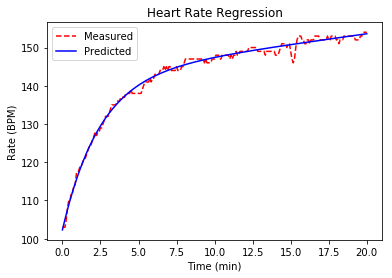

In [6]:
# alternative solution with Gekko
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# install Gekko, if needed
try:
    from gekko import GEKKO
except:
    try:
        from pip import main as pipmain
    except:
        from pip._internal import main as pipmain
    pipmain(['install','gekko'])
    from gekko import GEKKO

# import data
# Time (sec),Heart Rate (BPM)
url = 'https://apmonitor.com/che263/uploads/Main/heart_rate.txt'
x = pd.read_csv(url)

# print first rows
print('Data')
print(x.head())

# extract vectors
t = np.array(x['Time (sec)'])
ym = np.array(x['Heart Rate (BPM)'])

# GEKKO model
m = GEKKO()

# parameters
tm = m.Param(value=t)
c0 = m.FV(value=100)
c1 = m.FV(value=0.01)
c2 = m.FV(value=100)
c3 = m.FV(value=0.01)
c0.STATUS=1
c1.STATUS=1
c2.STATUS=1
c3.STATUS=1

# variables
bpm = m.CV(value=ym)
bpm.FSTATUS=1

# regression equation
m.Equation(bpm==c0+c1*tm-c2*m.exp(-c3*tm))

# regression mode
m.options.IMODE = 2  

# optimize
m.solve(disp=False)

# print parameters
print('Optimal parameters')
print(c0.value[0])
print(c1.value[0])
print(c2.value[0])
print(c3.value[0])

# calculate r^2
print('R^2: ' + str(r2_score(ym,bpm)))

# plot data and prediction
plt.figure()
plt.title('Heart Rate Regression')
plt.plot(t/60.0,ym,'r--',label='Measured')
plt.plot(t/60.0,bpm,'b-',label='Predicted')
plt.ylabel('Rate (BPM)')
plt.xlabel('Time (min)')
plt.legend(loc='best')
plt.show() 

#### Problem #2
Solution in Python for comparison to Excel solution.

Data
   time (min)    y
0         0.0  0.0
1         0.1  0.0
2         0.2  1.9
3         0.3  3.2
4         0.4  4.0
Optimal parameters
[0.19759135 0.10087399]
R^2:  0.9992699621460142


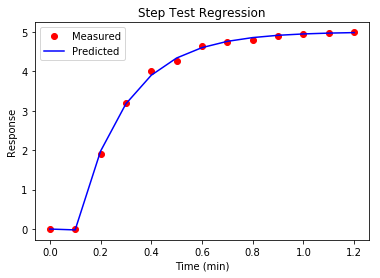

In [4]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score

# import data
# time (min),y
url = 'https://apmonitor.com/che263/uploads/Main/dynamics.txt'
x = pd.read_csv(url)

# print first rows
print('Data')
print(x.head())

# extract vectors
t = x['time (min)'].values
ym = x['y'].values

# define function for fitting
def yfcn(t,tau,theta):
    n = len(t)
    res = np.zeros(n)
    for i in range(n):
        if i>=theta:
            res[i] = 5.0*(1.0-np.exp(-(t[i]-theta)/tau))
    return res

# find optimal parameters
c,cov = curve_fit(yfcn,t,ym)

# print parameters
print('Optimal parameters')
tau = c[0]
theta = c[1]
print(c)

# calculate prediction
yp = yfcn(t,tau,theta)

# calculate r^2
print('R^2: ', r2_score(yp,ym))

# plot data and prediciton
plt.figure()
plt.title('Step Test Regression')
plt.plot(t,ym,'ro',label='Measured')
plt.plot(t,yp,'b-',label='Predicted')
plt.ylabel('Response')
plt.xlabel('Time (min)')
plt.legend(loc='best')
plt.show() 

#### Problem #3
Solution in Python for comparison to Excel solution.

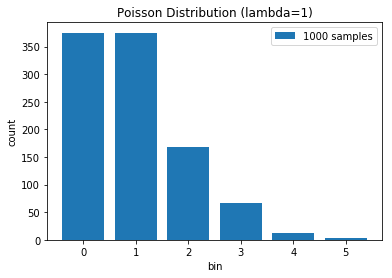

In [5]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# generate 1000 random numbers
#  with Poisson distribution and lambda=1
n = 1000
lam = 1
x = np.random.poisson(lam,n)

# count number in each bin
bins=[0,1,2,3,4,5,6]
hist, _ = np.histogram(x, bins)

# plot histogram data
plt.bar(bins[0:-1],hist,label='1000 samples')
plt.xlabel('bin')
plt.ylabel('count')
plt.title('Poisson Distribution (lambda=1)')
plt.legend(loc='best')
plt.show()